#  Segmenting and Clustering Neighborhoods in Toronto

## Part I: Collecting our data from an online source

In [1]:
# import libraries

import bs4 as bs
import requests
import pandas as pd

Web Scrape the Wikipedia page to grab the table data and put it in a dataframe.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

res = requests.get(url)

soup = bs.BeautifulSoup(res.content, 'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
# Table acquired, but will need to be cleaned further

data.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# Filter out the 'Not Assigned' features from Boroughs

selected_data = data[data['Borough'] != 'Not assigned']

In [5]:
# We now have a cleaned table to work with

selected_data.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# #Shape of Data
selected_data.shape

(103, 3)

## Part II: Incorporating coordinates
Get the Longitude and Lattitude coordinates for each neighborhood and add it to the table

In [7]:
# We will collect the coordinates from an existing online csv file
geospatial_url = 'https://cocl.us/Geospatial_data'
geospatial_data = pd.read_csv(geospatial_url)

geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
geospatial_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [9]:
# Add the coordinates to the previous dataframe
merged_data = pd.merge(selected_data, geospatial_data, on = 'Postal Code')

merged_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## Part III: Observations

In [10]:
!pip install folium

In [11]:
!pip install geopy

In [12]:
# We will use folium to superimpose our neighborhoods on a map
import folium
from geopy.geocoders import Nominatim

In [13]:
# We will use Nominatium to grab the coordinates of Toronto, Canada to have as a starting point for our future maps

address = 'Toronto, CA'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


In [14]:
tor = merged_data
tor

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## All Boroughs

In [15]:
# create map of Toronto, Canada using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(tor['Latitude'], tor['Longitude'], tor['Borough'], tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

#### We have now generated a map of Toronto which includes all noted Neighbourhoods within different Boroughs. We can see a higher density of defined neighborhoods in Downtown.

Let's try and focus on one specific borough. We will take interest in Downtown Toronto.

In [79]:
downtown_data = tor[tor['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head(20)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


## Downtown Toronto

In [17]:
# create map of Downtown Toronto
map_dtn = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Borough'], downtown_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dtn)  
    
map_dtn

Off the bat, we can note some interesting features about the neighborhoods of Downtown Toronto. We can see that neighborhoods are closer and nearby key locations such as University of Toronto, Union Station, or Rogers Centre.

In [18]:
# How many unique Boroughs exist in Toronto and what are they?
tor['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [19]:
# Show the counts
tor['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [20]:
nor_york = tor[tor['Borough'] == 'North York'].reset_index(drop=True)
nor_york.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


## North York

In [21]:
# create map of North York
map_nor_york = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(nor_york['Latitude'], nor_york['Longitude'], nor_york['Borough'], nor_york['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nor_york)  
    
map_nor_york

North York is the northernmost borough of Toronto and features the most number neighborhoods. Features includes greatest proximity to number of highways, an airport, and uniform distance between neighborhoods.

In [22]:
etob = tor[tor['Borough'] == 'Etobicoke'].reset_index(drop=True)
etob.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
1,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724
2,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201
3,M9P,Etobicoke,Westmount,43.696319,-79.532242
4,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724


## Etobicoke

In [23]:
# create map of Etobicoke
map_etob = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(etob['Latitude'], etob['Longitude'], etob['Borough'], etob['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etob)  
    
map_etob

## Scarborough

In [24]:
scar = tor[tor['Borough'] == 'Scarborough'].reset_index(drop=True)
scar.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [25]:
# create map of Scarborough
map_scar = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(scar['Latitude'], scar['Longitude'], scar['Borough'], scar['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scar)  
    
map_scar

## East York

In [26]:
e_york = tor[tor['Borough'] == 'East York'].reset_index(drop=True)
e_york.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
1,M4C,East York,Woodbine Heights,43.695344,-79.318389
2,M4G,East York,Leaside,43.709060,-79.363452
3,M4H,East York,Thorncliffe Park,43.705369,-79.349372
4,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106


In [27]:
# create map of East York
map_e_york = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(e_york['Latitude'], e_york['Longitude'], e_york['Borough'], e_york['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_e_york)  
    
map_e_york

## York

In [28]:
york = tor[tor['Borough'] == 'York'].reset_index(drop=True)
york.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188


In [29]:
# create map of York
map_york = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(york['Latitude'], york['Longitude'], york['Borough'], york['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_york)  
    
map_york

## East Toronto

In [30]:
e_tor = tor[tor['Borough'] == 'East Toronto'].reset_index(drop=True)
e_tor.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [31]:
# create map of East Toronto
map_e_tor = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(e_tor['Latitude'], e_tor['Longitude'], e_tor['Borough'], e_tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_e_tor)  
    
map_e_tor

## West Toronto

In [32]:
w_tor = tor[tor['Borough'] == 'West Toronto'].reset_index(drop=True)
w_tor.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
1,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
2,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
4,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325


In [33]:
# create map of West Toronto
map_w_tor = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(w_tor['Latitude'], w_tor['Longitude'], w_tor['Borough'], w_tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_w_tor)
    
map_w_tor

## Central Toronto

In [34]:
c_tor = tor[tor['Borough'] == 'Central Toronto'].reset_index(drop=True)
c_tor.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
4,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678


In [35]:
# create map of Central Toronto
map_c_tor = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(c_tor['Latitude'], c_tor['Longitude'], c_tor['Borough'], c_tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_c_tor)
    
map_c_tor

## Mississauga

In [36]:
miss = tor[tor['Borough'] == 'Mississauga'].reset_index(drop=True)
miss.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819


In [37]:
# create map of Mississauga
map_miss = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(miss['Latitude'], miss['Longitude'], miss['Borough'], miss['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miss)
    
map_miss

We have successfully webscrapped information about boroughs and their neighborhoods in Toronto. In this notebook, we have narrowed down our data to show neighborhoods in Downtown Toronto. For week 4 and 5, we will use this data to come up with project ideas to explore the data even further using foursquare API.

<blockquote cite="https://www.coursera.org/learn/applied-data-science-capstone/peer/60zST/capstone-project-the-battle-of-neighborhoods-week-1">
Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:
<hr></hr>
In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?
These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.
</blockquote>

# Week 4

<p>
    This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks.  Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.
    </p>

<p>
For this week, you will required to submit the following:
    </p>
    

<ol>A description of the problem and a discussion of the background. (15 marks)</ol>
    <ol>A description of the data and how it will be used to solve the problem. (15 marks)</ol>


Define Foursquare Credentials and Version

In [38]:
CLIENT_ID = 'SOW1GTHG2XT42NLQ3KCFLYKBFG1WI1E3M1NXKN22NDIZCASW' # your Foursquare ID
CLIENT_SECRET = 'CQPJ2GZBFYXN50XMXWL1L1APSWZCUMISK4LNWYD5FIB1THQS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: SOW1GTHG2XT42NLQ3KCFLYKBFG1WI1E3M1NXKN22NDIZCASW
CLIENT_SECRET:CQPJ2GZBFYXN50XMXWL1L1APSWZCUMISK4LNWYD5FIB1THQS


For the purpose of this notebook, let's explore the neighborhoods in Downtown Toronto

#### Let's explore the first neighborhood in our dataframe.
Get the neighborhood's name.


In [39]:
downtown_data.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

In [40]:
neighborhood_latitude = downtown_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.
First, let's create the GET request URL. Name your URL **url**.


In [41]:

LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL



'https://api.foursquare.com/v2/venues/explore?&client_id=SOW1GTHG2XT42NLQ3KCFLYKBFG1WI1E3M1NXKN22NDIZCASW&client_secret=CQPJ2GZBFYXN50XMXWL1L1APSWZCUMISK4LNWYD5FIB1THQS&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60440d03e07df94bd738d0bd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
# library to deal with json files
import json 

Now we are ready to clean the json and structure it into a _pandas_ dataframe.


In [45]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


How many venues were returned by Foursquare?

In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

47 venues were returned by Foursquare.


# Exploring neighborhoods in Downtown Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto


In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called downtown_venues.


In [48]:
# type your answer here
downtown_venues = getNearbyVenues(names=downtown_data['Neighbourhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [49]:
print(downtown_venues.shape)
downtown_venues.head()

(1219, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Let's check how many venues were returned for each neighborhood


In [50]:
downtown_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,58,58,58,58,58,58
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,59,59,59,59,59,59
Christie,15,15,15,15,15,15
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues


In [51]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 208 uniques categories.


## Analyzing Each Neighborhood

In [52]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighbourhood'] = downtown_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Neighbourhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
downtown_onehot.columns

Index(['Neighbourhood', 'Airport', 'Airport Food Court', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'American Restaurant',
       'Antique Shop', 'Aquarium', 'Art Gallery',
       ...
       'Theater', 'Theme Restaurant', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop', 'Yoga Studio'],
      dtype='object', length=209)

And let's examine the new dataframe size.


In [54]:
downtown_onehot.describe()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,...,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,0.000820,0.000820,0.001641,0.001641,0.001641,0.013946,0.001641,0.004102,0.009024,0.001641,...,0.009844,0.000820,0.000820,0.002461,0.012305,0.001641,0.003281,0.006563,0.000820,0.005742
std,0.028642,0.028642,0.040489,0.040489,0.040489,0.117314,0.040489,0.063939,0.094603,0.040489,...,0.098769,0.028642,0.028642,0.049568,0.110289,0.040489,0.057213,0.080778,0.028642,0.075592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
list(downtown_onehot.columns.values)

['Neighbourhood',
 'Airport',
 'Airport Food Court',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Butcher',
 'Café',
 'Candy Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Arts Building',
 'College Auditorium',
 'College Cafeteria',
 'College Gym',
 'College Rec Center',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Comic Shop',
 'Concert Hall',
 'Convenience S

In [56]:
# Suppose we are interested in only looking at types of restaurants, grab columns of different restaurants

columns_list = list(downtown_onehot.columns.values)
for venue in columns_list:
    downtown_restaurants = []
    if 'Restaurant' in venue:
        downtown_restaurants.append(venue)
        print(downtown_restaurants)

['American Restaurant']
['Asian Restaurant']
['Belgian Restaurant']
['Brazilian Restaurant']
['Caribbean Restaurant']
['Chinese Restaurant']
['Colombian Restaurant']
['Comfort Food Restaurant']
['Doner Restaurant']
['Dumpling Restaurant']
['Eastern European Restaurant']
['Ethiopian Restaurant']
['Falafel Restaurant']
['Fast Food Restaurant']
['Filipino Restaurant']
['French Restaurant']
['German Restaurant']
['Gluten-free Restaurant']
['Greek Restaurant']
['Indian Restaurant']
['Italian Restaurant']
['Japanese Restaurant']
['Korean Restaurant']
['Latin American Restaurant']
['Mediterranean Restaurant']
['Mexican Restaurant']
['Middle Eastern Restaurant']
['Modern European Restaurant']
['Molecular Gastronomy Restaurant']
['Moroccan Restaurant']
['New American Restaurant']
['Portuguese Restaurant']
['Ramen Restaurant']
['Restaurant']
['Seafood Restaurant']
['Sushi Restaurant']
['Taiwanese Restaurant']
['Thai Restaurant']
['Theme Restaurant']
['Vegetarian / Vegan Restaurant']
['Vietnamese

In [57]:
rests = [['American Restaurant'],
['Asian Restaurant'],
['Belgian Restaurant'],
['Brazilian Restaurant'],
['Caribbean Restaurant'],
['Chinese Restaurant'],
['Colombian Restaurant'],
['Comfort Food Restaurant'],
['Doner Restaurant'],
['Dumpling Restaurant'],
['Eastern European Restaurant'],
['Ethiopian Restaurant'],
['Falafel Restaurant'],
['Fast Food Restaurant'],
['Filipino Restaurant'],
['French Restaurant'],
['German Restaurant'],
['Gluten-free Restaurant'],
['Greek Restaurant'],
['Indian Restaurant'],
['Italian Restaurant'],
['Japanese Restaurant'],
['Korean Restaurant'],
['Latin American Restaurant'],
['Mediterranean Restaurant'],
['Mexican Restaurant'],
['Middle Eastern Restaurant'],
['Modern European Restaurant'],
['Molecular Gastronomy Restaurant'],
['Moroccan Restaurant'],
['New American Restaurant'],
['Portuguese Restaurant'],
['Ramen Restaurant'],
['Restaurant'],
['Seafood Restaurant'],
['Sushi Restaurant'],
['Taiwanese Restaurant'],
['Thai Restaurant'],
['Theme Restaurant'],
['Vegetarian / Vegan Restaurant'],
['Vietnamese Restaurant']]


In [58]:
dtn_rests_only = downtown_onehot[['Neighbourhood','American Restaurant',
 'Asian Restaurant',
 'Belgian Restaurant',
 'Brazilian Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Doner Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Latin American Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'Moroccan Restaurant',
 'New American Restaurant',
 'Portuguese Restaurant',
 'Ramen Restaurant',
 'Restaurant',
 'Seafood Restaurant',
 'Sushi Restaurant',
 'Taiwanese Restaurant',
 'Thai Restaurant',
 'Theme Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant']]

dtn_rests_only

,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1216,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1217,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
dtn_rests_only[['Japanese Restaurant','Ramen Restaurant','Asian Restaurant']].sum()

Japanese Restaurant    32
Ramen Restaurant        4
Asian Restaurant       11
dtype: int64

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [59]:
downtown_grouped = downtown_onehot.groupby('Neighbourhood').mean().reset_index()
downtown_grouped

,Neighbourhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,...,0.000000,0.000000,0.00,0.00,0.017241,0.00000,0.000000,0.000000,0.000000,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.016949,0.00000,0.000000,0.016949,0.000000,0.016949
3,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.00,0.000000,...,0.013333,0.013333,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.026667
5,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.010000,...,0.000000,0.000000,0.00,0.00,0.020000,0.00000,0.000000,0.010000,0.000000,0.000000
6,"First Canadian Place, Underground city",0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.00,0.010000,...,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.000000,0.010000,0.000000,0.000000
7,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,...,0.020000,0.000000,0.00,0.00,0.000000,0.01000,0.010000,0.010000,0.000000,0.000000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.010000,...,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.000000,0.010000,0.000000,0.000000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.047619,0.00000,0.047619,0.015873,0.000000,0.000000


In [60]:
dtn_rests_only
dtn_rests_grouped = dtn_rests_only.groupby('Neighbourhood').mean().reset_index()
dtn_rests_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Doner Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,...,0.000000,0.000000,0.034483,0.034483,0.000000,0.000000,0.017241,0.000000,0.017241,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016949,0.016949,0.000000,0.016949,0.016949,0.000000,0.033898,0.000000,0.016949,0.000000
3,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Church and Wellesley,0.013333,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.013333,0.040000,0.000000,0.066667,0.000000,0.013333,0.013333,0.000000,0.000000
5,"Commerce Court, Victoria Hotel",0.040000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.070000,0.030000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000
6,"First Canadian Place, Underground city",0.030000,0.030000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.050000,0.030000,0.020000,0.000000,0.020000,0.000000,0.010000,0.000000
7,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.020000,0.010000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.030000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.000000,0.015873,0.000000,0.031746,0.000000,0.000000,0.015873,0.015873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619


In [95]:
downtown_gen_asian = downtown_grouped[['Neighbourhood','Ramen Restaurant','Asian Restaurant', 'Japanese Restaurant']]

downtown_gen_asian

,Neighbourhood,Ramen Restaurant,Asian Restaurant,Japanese Restaurant
0,Berczy Park,0.000000,0.000000,0.017241
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.000000
2,Central Bay Street,0.016949,0.000000,0.033898
3,Christie,0.000000,0.000000,0.000000
4,Church and Wellesley,0.013333,0.000000,0.066667
5,"Commerce Court, Victoria Hotel",0.000000,0.020000,0.030000
6,"First Canadian Place, Underground city",0.000000,0.030000,0.040000
7,"Garden District, Ryerson",0.020000,0.000000,0.030000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.010000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.000000,0.015873


#### Let's print each neighborhood along with the top 5 most common venues


In [80]:
num_top_venues = 10

for hood in dtn_rests_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = dtn_rests_grouped[dtn_rests_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                           venue    freq
0             Seafood Restaurant  0.0345
1                     Restaurant  0.0345
2              French Restaurant  0.0172
3  Vegetarian / Vegan Restaurant  0.0172
4            Japanese Restaurant  0.0172
5                Thai Restaurant  0.0172
6        Comfort Food Restaurant  0.0172
7    Eastern European Restaurant  0.0172
8               Greek Restaurant  0.0172
9            American Restaurant  0.0000


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                             venue  freq
0              American Restaurant   0.0
1              Japanese Restaurant   0.0
2        Latin American Restaurant   0.0
3         Mediterranean Restaurant   0.0
4               Mexican Restaurant   0.0
5        Middle Eastern Restaurant   0.0
6       Modern European Restaurant   0.0
7  Molecular Gastronomy Restaurant   0.0
8              Moroccan Restaurant   0.0
9 

First, let's write a function to sort the venues in descending order.

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [64]:
import numpy as np

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = downtown_grouped['Neighbourhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dtn_rests_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Restaurant,Seafood Restaurant,Comfort Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,Greek Restaurant,Thai Restaurant,Caribbean Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Vietnamese Restaurant,Indian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
3,Christie,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Indian Restaurant,Korean Restaurant,Mexican Restaurant


## Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [66]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [67]:
# set number of clusters
kclusters = 5

downtown_grouped_clustering = dtn_rests_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 3, 3, 2, 0, 0, 3, 3, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [68]:
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Restaurant,Seafood Restaurant,Comfort Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,Greek Restaurant,Thai Restaurant,Caribbean Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Vietnamese Restaurant,Indian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
2,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
3,Christie,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Indian Restaurant,Korean Restaurant,Mexican Restaurant


In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [70]:


downtown_merged = downtown_data

# merge downtown_grouped with downtown_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

                                       
downtown_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Greek Restaurant,Asian Restaurant,French Restaurant,Restaurant,Eastern European Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,American Restaurant,Seafood Restaurant,Moroccan Restaurant,Restaurant,Italian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Belgian Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Restaurant,Seafood Restaurant,Comfort Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,Greek Restaurant,Thai Restaurant,Caribbean Restaurant


In [84]:
downtown_merged['1st Most Common Venue'].value_counts()

Restaurant               5
Italian Restaurant       5
Vietnamese Restaurant    3
Japanese Restaurant      2
Sushi Restaurant         1
Seafood Restaurant       1
Greek Restaurant         1
American Restaurant      1
Name: 1st Most Common Venue, dtype: int64

In [85]:
downtown_merged['2nd Most Common Venue'].value_counts()

Italian Restaurant               5
Restaurant                       3
Indian Restaurant                2
Thai Restaurant                  2
Seafood Restaurant               2
Japanese Restaurant              2
Asian Restaurant                 1
Vegetarian / Vegan Restaurant    1
Sushi Restaurant                 1
Name: 2nd Most Common Venue, dtype: int64

In [81]:
downtown_merged['3rd Most Common Venue'].value_counts()

American Restaurant          3
Mexican Restaurant           2
French Restaurant            2
Restaurant                   2
Japanese Restaurant          2
Gluten-free Restaurant       2
Middle Eastern Restaurant    1
Seafood Restaurant           1
Dumpling Restaurant          1
Chinese Restaurant           1
Moroccan Restaurant          1
Comfort Food Restaurant      1
Name: 3rd Most Common Venue, dtype: int64

Finally, let's visualize the resulting clusters

In [72]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


### Cluster 1

In [100]:
cluster_1= downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[2] + list(range(3, downtown_merged.shape[1]))]]
cluster_1

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,St. James Town,43.651494,-79.375418,0,American Restaurant,Seafood Restaurant,Moroccan Restaurant,Restaurant,Italian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Belgian Restaurant
7,"Richmond, Adelaide, King",43.650571,-79.384568,0,Restaurant,Thai Restaurant,American Restaurant,Asian Restaurant,Sushi Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Colombian Restaurant,Gluten-free Restaurant,Japanese Restaurant
9,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,American Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
10,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0,Restaurant,Italian Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Gluten-free Restaurant,Fast Food Restaurant
17,"First Canadian Place, Underground city",43.648429,-79.382280,0,Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Mediterranean Restaurant,Brazilian Restaurant,Colombian Restaurant


In Cluster 1: 'Ramen Restaurant', 'Japanese Restaurant', or 'Asian Restaurant' have appeared in total 10
Accounts for 0.2 of the top 10 common venues in cluster 1. 

In [111]:
cluster_1['1st Most Common Venue'].value_counts()

Restaurant             4
American Restaurant    1
Name: 1st Most Common Venue, dtype: int64

In [112]:
cluster_1['2nd Most Common Venue'].value_counts()

Italian Restaurant     2
Japanese Restaurant    1
Seafood Restaurant     1
Thai Restaurant        1
Name: 2nd Most Common Venue, dtype: int64

In [113]:
cluster_1['3rd Most Common Venue'].value_counts()

American Restaurant    3
Moroccan Restaurant    1
Seafood Restaurant     1
Name: 3rd Most Common Venue, dtype: int64

In [114]:
cluster_1['4th Most Common Venue'].value_counts()

Asian Restaurant       2
Restaurant             1
Japanese Restaurant    1
Seafood Restaurant     1
Name: 4th Most Common Venue, dtype: int64

In [116]:
cluster_1['5th Most Common Venue'].value_counts()

Sushi Restaurant       1
Italian Restaurant     1
Seafood Restaurant     1
Japanese Restaurant    1
American Restaurant    1
Name: 5th Most Common Venue, dtype: int64

### Cluster 2

In [75]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[2] + list(range(3, downtown_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",43.654260,-79.360636,1,Greek Restaurant,Asian Restaurant,French Restaurant,Restaurant,Eastern European Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
13,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,1,Vietnamese Restaurant,Indian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
14,Rosedale,43.679563,-79.377529,1,Vietnamese Restaurant,Indian Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In Cluster 2: 'Ramen Restaurant', 'Japanese Restaurant', or 'Asian Restaurant' have appeared in total 1
Accounts for 0.03 of the top 10 common venues in cluster 2. 

### Cluster 3

In [76]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[2] + list(range(3, downtown_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
11,"University of Toronto, Harbord",43.662696,-79.400049,2,Japanese Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Comfort Food Restaurant,Eastern European Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
18,Church and Wellesley,43.665860,-79.383160,2,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Indian Restaurant,Korean Restaurant,Mexican Restaurant


In Cluster 3: 'Ramen Restaurant', 'Japanese Restaurant', or 'Asian Restaurant' have appeared in total 1
Accounts for 0.16 of the top 10 common venues in cluster 3. 

### Cluster 4

In [77]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[2] + list(range(3, downtown_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Garden District, Ryerson",43.657162,-79.378937,3,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Ramen Restaurant,Modern European Restaurant,Chinese Restaurant,Ethiopian Restaurant,Mexican Restaurant,Vietnamese Restaurant
4,Berczy Park,43.644771,-79.373306,3,Restaurant,Seafood Restaurant,Comfort Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Eastern European Restaurant,Greek Restaurant,Thai Restaurant,Caribbean Restaurant
5,Central Bay Street,43.657952,-79.387383,3,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Portuguese Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Middle Eastern Restaurant,Modern European Restaurant
6,Christie,43.669542,-79.422564,3,Italian Restaurant,Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
8,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,3,Italian Restaurant,Restaurant,Mexican Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,New American Restaurant
15,Stn A PO Boxes,43.646435,-79.374846,3,Seafood Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant,Molecular Gastronomy Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant
16,"St. James Town, Cabbagetown",43.667967,-79.367675,3,Italian Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Eastern European Restaurant,French Restaurant


In Cluster 4: 'Ramen Restaurant', 'Japanese Restaurant', or 'Asian Restaurant' have appeared in total 1
Accounts for 0.1 of the top 10 common venues in cluster 4. 

### Cluster 5

In [78]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[2] + list(range(3, downtown_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,4,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Caribbean Restaurant,Belgian Restaurant,Japanese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,Filipino Restaurant


In Cluster 5: 'Ramen Restaurant', 'Japanese Restaurant', or 'Asian Restaurant' have appeared in total 1
Accounts for 0.10 of the top 10 common venues in cluster 5. 

In [126]:
df_freq = pd.DataFrame(
    {'Cluster':[1,2,3,4,5],
     'Frequency':[0.2,0.03,0.16,0.10,0.10]})

df_freq

,Cluster,Frequency
0,1,0.20
1,2,0.03
2,3,0.16
3,4,0.10
4,5,0.10


In [132]:
import matplotlib as plt

In [141]:
%matplotlib inline

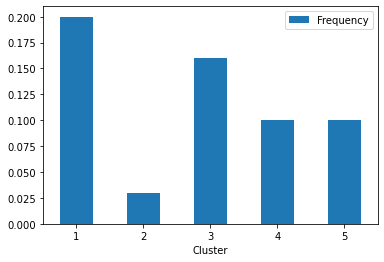

In [144]:
ax = df_freq.plot.bar(x='Cluster', y='Frequency', rot=0)
plt.title = 'Prevalence of Restaurant Type in Top 10 Venues'
ax

In [146]:
# Frequency of 'Ramen Restaurants'/'Asian Restaurants'/'Japanese Restaurants' per neighborhood in cluster 1
df_freq2 = pd.DataFrame(
    {'Neighbourhood':['St. James Town, Cabbagetown','Richmond, Adelaide, King','Toronto Dominion Centre, Design Exchange','First Canadian Place, Underground city','Commerce Court, Victoria Hotel'],
     'Frequency':[0.0213,0.0316,0.05,0.07,0.05]})

df_freq2

,Neighbourhood,Frequency
0,"St. James Town, Cabbagetown",0.0213
1,"Richmond, Adelaide, King",0.0316
2,"Toronto Dominion Centre, Design Exchange",0.0500
3,"First Canadian Place, Underground city",0.0700
4,"Commerce Court, Victoria Hotel",0.0500


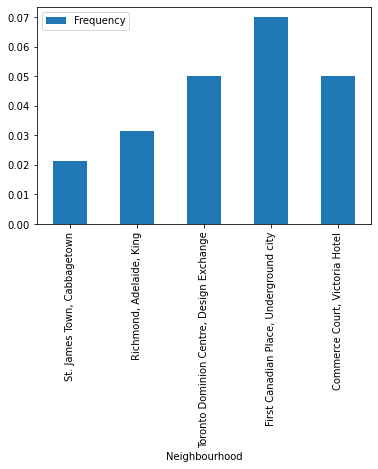

In [149]:
ax2 = df_freq2.plot.bar(x='Neighbourhood', y='Frequency', rot=90)
plt.title = 'Prevalence of Restaurant Type in Cluster 1'
ax2